# Семинар 7. Практика. Метрики качества и оценивание обобщающей способности.

In [1]:
import numpy as np
from sklearn import metrics

## Метрики качества регрессии

In [2]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale

data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [3]:
from sklearn.linear_model import Ridge

In [4]:
regr = Ridge()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

In [5]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))
print 'MAE:', metrics.mean_absolute_error(y_test, pred)
print 'R2:', metrics.r2_score(y_test, pred)

RMSE: 5.77398733204
MAE: 3.62297971635
R2: 0.673286579179


#### Как распределена ошибка по объектам?

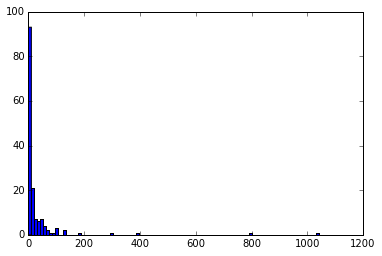

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

quad_errors = np.power(pred - y_test, 2.0)
plt.hist(quad_errors, bins=100)
plt.show()

In [7]:
idx = np.argmax(quad_errors)
X_test[idx, :]

array([ 0.15188824, -0.48772236,  1.01599907, -0.27259857,  0.65914726,
       -1.87290529,  1.11749449, -1.1706168 ,  1.66124525,  1.53092646,
        0.80657583,  0.20663395, -1.31666121])

In [8]:
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test[idx]))

2.25501270405


In [9]:
# среднее расстояние от тестового объекта до обучающей выборки
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).mean()
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).std()

0.9007185238
0.571274851176


Возможно, в обучающей выборке не было объектов, похожих на данный.

## Метрики качества классификации

In [10]:
import pandas as pd

THE CARAVAN INSURANCE DATA

http://kdd.ics.uci.edu/databases/tic/tic.html

Задача: предсказать, купит ли человек страховку

In [11]:
data = pd.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


Данные несбалансированные — мало кто покупает страховку

In [12]:
data.shape

(5822, 86)

In [13]:
data.iloc[:, -1].value_counts()

0    5474
1     348
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [15]:
print 'positive class ration in train:', np.mean(y_train)
print 'positive class ration in test:', np.mean(y_test)

positive class ration in train: 0.0606134969325
positive class ration in test: 0.0578133943904


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [17]:
print clf.predict_proba(X_test)

[[ 0.99145441  0.00854559]
 [ 0.94158018  0.05841982]
 [ 0.97874106  0.02125894]
 ..., 
 [ 0.92617085  0.07382915]
 [ 0.97704798  0.02295202]
 [ 0.99768942  0.00231058]]


In [27]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))

Accuracy: 0.940469376073
Accuracy of constant classifier: 0.94218660561


In [28]:
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)

Precision: 0.2
Recall: 0.00990099009901
F1: 0.0188679245283


In [20]:
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

AUC-ROC: 0.744475055039
AUC-PR: 0.165744655085


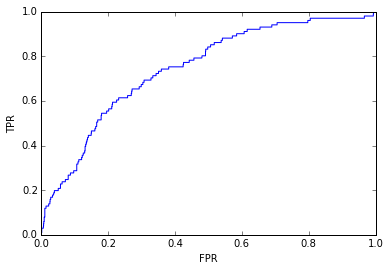

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

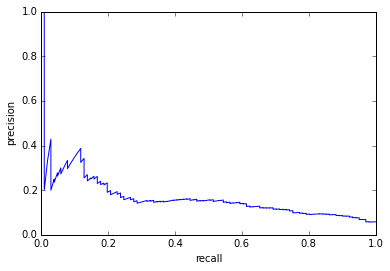

In [22]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [29]:
print metrics.classification_report(y_test, pred_binary)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1646
          1       0.20      0.01      0.02       101

avg / total       0.90      0.94      0.91      1747



#### Попробуем RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [31]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

Accuracy: 0.925586720092
Accuracy of constant classifier: 0.94218660561
Precision: 0.162790697674
Recall: 0.0693069306931
F1: 0.0972222222222
AUC-ROC: 0.726161832465
AUC-PR: 0.125353187241


(Random Forest не всегда лучше линейной модели)

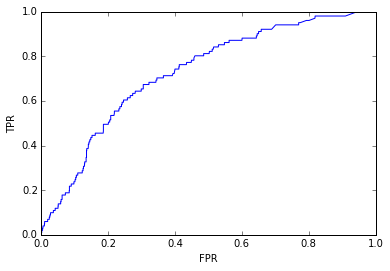

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

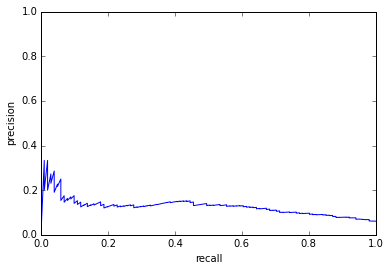

In [33]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

## Кросс-валидация

In [34]:
data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
search_range = np.arange(1, 10)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    print k, metrics.mean_squared_error(y_test, pred)

1 19.2700657895
2 11.8614078128
3 12.6754739044
4 14.3088354552
5 14.5501761164
6 16.3034670648
7 16.4737281191
8 16.7024469054
9 17.1385599542


In [37]:
from sklearn.cross_validation import ShuffleSplit, KFold, cross_val_score

In [38]:
cv = ShuffleSplit(X_train.shape[0], n_iter=1, random_state=241, 
                  test_size=0.2)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    print k, -cross_val_score(regr, X_train, y_train, cv=cv, scoring='mean_squared_error')

1 [ 27.52197183]
2 [ 18.2127791]
3 [ 19.49766226]
4 [ 18.52643943]
5 [ 16.17991066]
6 [ 15.9229394]
7 [ 16.62312082]
8 [ 15.20208773]
9 [ 14.88026744]


In [39]:
def do_kfold(k):
    cv = KFold(X_train.shape[0], n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
        scores = -cross_val_score(regr, X_train, y_train, cv=cv, 
                                  scoring='mean_squared_error')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

1 28.6803389831 5.54463276836 23.1357062147
2 23.6769494697 6.98371538167 16.6932340881
3 25.1501145065 6.41868407394 18.7314304326
4 25.7908673352 5.62170121114 20.1691661241
5 25.9757479139 5.90182338845 20.0739245254
6 25.7458446043 5.82748294988 19.9183616544
7 25.4841013579 6.33072228964 19.1533790682
8 25.6840387321 6.166540918 19.5174978141
9 26.336682717 6.53217765529 19.8045050617


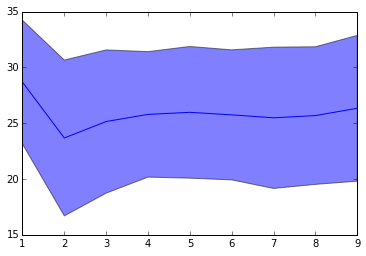

In [40]:
do_kfold(2)

1 34.4311307847 15.1074852959 19.3236454888
2 27.7648311775 11.812430725 15.9524004524
3 27.4434092689 9.38192777825 18.0614814907
4 27.3199121857 8.66211638101 18.6577958047
5 26.6855474899 10.2111731717 16.4743743182
6 26.2649791828 10.9540461966 15.3109329862
7 25.6522349921 10.7619657014 14.8902692907
8 25.7597960947 10.0989899429 15.6608061517
9 25.4458296504 9.73198887569 15.7138407747


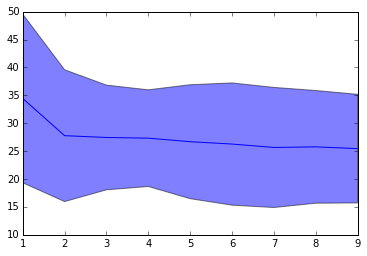

In [41]:
do_kfold(5)

1 30.5870738095 13.8154736379 16.7716001717
2 20.5308987352 9.42202350012 11.108875235
3 21.068738697 9.63485091449 11.4338877825
4 22.4567281035 10.3851298187 12.0715982848
5 23.1938307518 11.1491217466 12.0447090052
6 23.535225096 11.4372746621 12.0979504339
7 23.4717779867 12.2333359926 11.2384419942
8 23.930373692 12.6859892131 11.2443844789
9 23.9334730796 12.7016711101 11.2318019695


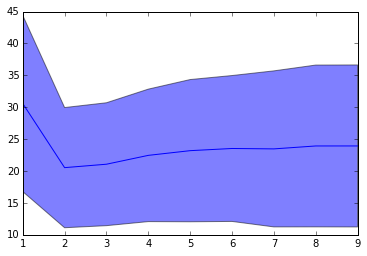

In [42]:
do_kfold(10)

1 30.1563083333 52.4971776142 -22.3408692809
2 20.6333306383 39.133591456 -18.5002608177
3 19.5040113432 35.4388771579 -15.9348658147
4 21.212014897 38.1627764351 -16.9507615381
5 21.8667572677 39.0687399155 -17.2019826478
6 22.1495189301 39.3284189748 -17.1789000447
7 22.3095381123 39.9954654914 -17.6859273791
8 22.610090213 40.8895733793 -18.2794831664
9 22.3910122414 40.9768663429 -18.5858541015


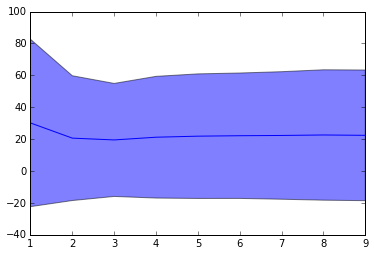

In [43]:
do_kfold(100)

Чем больше фолдов, тем меньше объектов попадает в контроль, тем менее надежно по нему оценивается качество — дисперсия растет

### Другой датасет

In [44]:
data = pd.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
search_range = np.arange(5, 71, 5)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)[:, 1]
    print k, metrics.roc_auc_score(y_test, pred)

5 0.589492799796
10 0.658646616541
15 0.669083726265
20 0.677363960749
25 0.69746081305
30 0.690814961132
35 0.685851280744
40 0.689556518415
45 0.681381419651
50 0.686246336179
55 0.689174206703
60 0.695259334778
65 0.699133426787
70 0.704884032114


In [47]:
from sklearn.cross_validation import StratifiedKFold, StratifiedShuffleSplit

In [48]:
cv = StratifiedShuffleSplit(y_train, n_iter=1, random_state=241, test_size=0.3)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    print k, cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

5 [ 0.62692149]
10 [ 0.68131969]
15 [ 0.68692929]
20 [ 0.6956018]
25 [ 0.70625315]
30 [ 0.70433167]
35 [ 0.70849585]
40 [ 0.71448974]
45 [ 0.70843275]
50 [ 0.72253132]
55 [ 0.72023127]
60 [ 0.70803125]
65 [ 0.71177098]
70 [ 0.70784197]


In [49]:
def do_kfold(k):
    cv = StratifiedKFold(y_train, n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

5 0.588208827703 0.00521645449735 0.582992373206
10 0.616215972415 0.00159759759229 0.614618374822
15 0.646600886035 0.00158879276668 0.645012093269
20 0.668125177445 0.0113370836495 0.656788093796
25 0.671434083233 0.00390626047464 0.667527822758
30 0.670759504421 0.000166130790428 0.67059337363
35 0.673057572081 0.00674731690721 0.666310255174
40 0.677524766168 0.00952722190469 0.667997544263
45 0.681299771791 0.0156240526842 0.665675719107
50 0.686227841679 0.0117716267282 0.674456214951
55 0.683241877602 0.0129946145533 0.670247263048
60 0.687683433867 0.0142593701167 0.67342406375
65 0.685859109971 0.0103192392683 0.675539870703
70 0.683798780778 0.00815590097287 0.675642879805


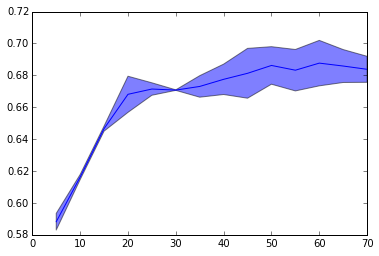

In [50]:
do_kfold(2)

5 0.583305092081 0.0241359286473 0.559169163434
10 0.621715105212 0.0291870452967 0.592528059915
15 0.648957300287 0.0202141429923 0.628743157294
20 0.661129554816 0.0165107946906 0.644618760126
25 0.668034461843 0.0120674787119 0.655966983131
30 0.682157618261 0.0200644820377 0.662093136223
35 0.685650612967 0.0123769769427 0.673273636025
40 0.693369234749 0.00767344555233 0.685695789196
45 0.693975832225 0.0097394641131 0.684236368111
50 0.697654254002 0.0153524688249 0.682301785177
55 0.694927390995 0.015263318015 0.67966407298
60 0.693698231248 0.0179997972307 0.675698434017
65 0.698868797274 0.0191140260943 0.67975477118
70 0.70068880542 0.0198155687838 0.680873236636


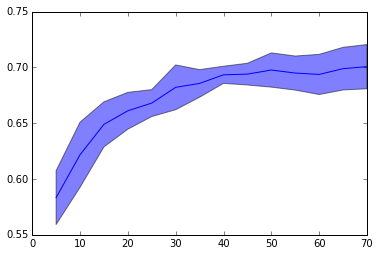

In [51]:
do_kfold(5)

5 0.58919282978 0.0406930364169 0.548499793363
10 0.635307791152 0.0410117636858 0.594296027466
15 0.664338402968 0.0357636180677 0.6285747849
20 0.66592659852 0.0415298633722 0.624396735148
25 0.67891429659 0.0409086482798 0.63800564831
30 0.686656476573 0.0449572491566 0.641699227417
35 0.698717381589 0.0472085333237 0.651508848265
40 0.70305932035 0.0395345084048 0.663524811945
45 0.705782702534 0.0427609306934 0.66302177184
50 0.707227640909 0.0434613348651 0.663766306043
55 0.701102523268 0.0488836634559 0.652218859812
60 0.703038015687 0.0508739184996 0.652164097187
65 0.704554044789 0.051238270522 0.653315774267
70 0.702393200132 0.054246604516 0.648146595616


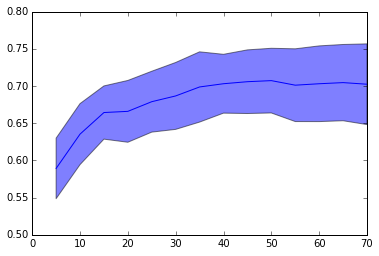

In [52]:
do_kfold(10)